In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the image in grayscale
image_path = 'doggy.jpg'  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

In [3]:
# Check if the image is loaded
if img is None:
    print("Error: Image not found. Please check the path.")
    exit()

In [4]:
# Function to increase brightness
def increase_brightness(image, value):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # Convert to HSV
    h, s, v = cv2.split(hsv)  # Split HSV channels
    v = cv2.add(v, value)  # Increase the V (brightness) channel
    v = np.clip(v, 0, 255)  # Ensure pixel values stay in range
    bright_hsv = cv2.merge((h, s, v))  # Merge back HSV channels
    bright_image = cv2.cvtColor(bright_hsv, cv2.COLOR_HSV2BGR)  # Convert back to BGR 
    return bright_image

In [5]:
# Function to adjust contrast using alpha-beta correction
def adjust_contrast(image, alpha, beta):
    # alpha: contrast (1.0 means no change)
    # beta: brightness adjustment (0 means no change)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

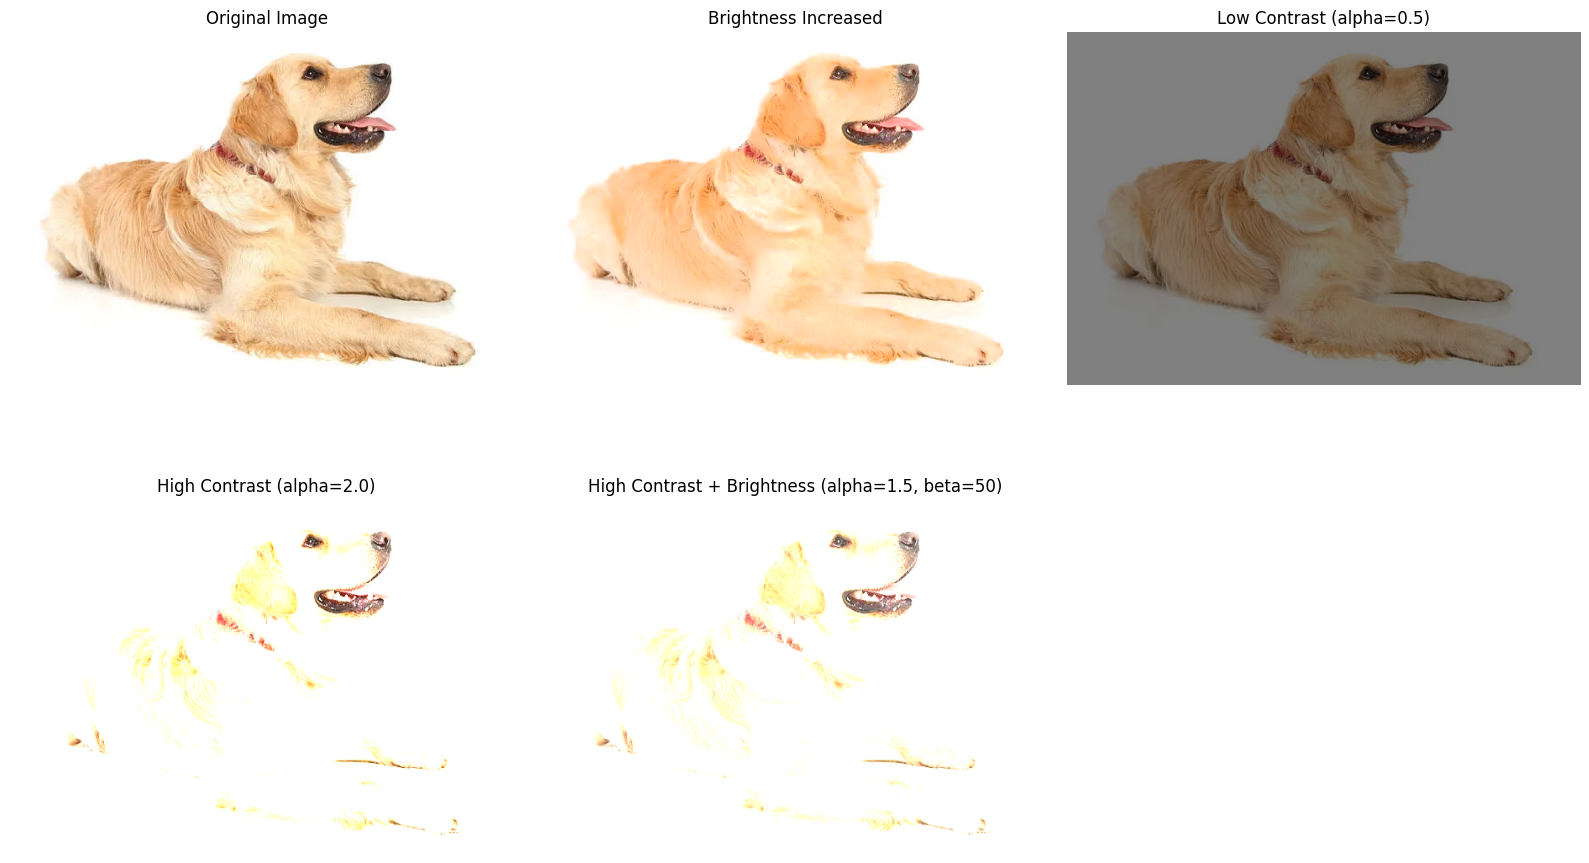

In [6]:
# Increase brightness
bright_image = increase_brightness(img, value=50)

# Adjust contrast using different alpha values
contrast_low = adjust_contrast(img, alpha=0.5, beta=0)  # Decrease contrast
contrast_high = adjust_contrast(img, alpha=2.0, beta=0)  # Increase contrast
contrast_with_brightness = adjust_contrast(img, alpha=1.5, beta=50)  # Adjust both

# Display results
titles = [
    "Original Image",
    "Brightness Increased",
    "Low Contrast (alpha=0.5)",
    "High Contrast (alpha=2.0)",
    "High Contrast + Brightness (alpha=1.5, beta=50)"
]
images = [img, bright_image, contrast_low, contrast_high, contrast_with_brightness]

plt.figure(figsize=(16, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.title(title)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.axis('off')

plt.tight_layout()
plt.show()

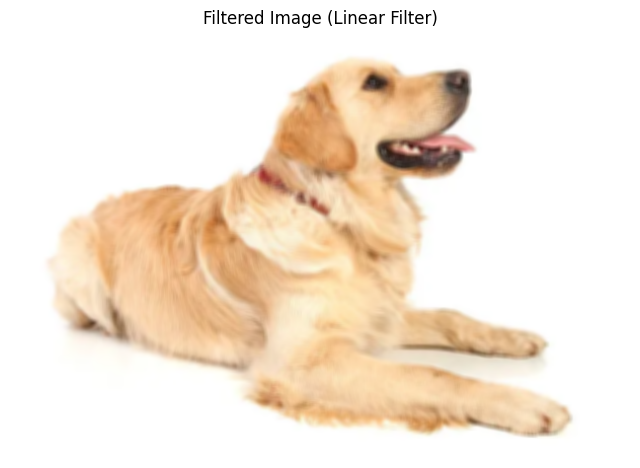

In [7]:
# Apply a linear filter to remove noise
filtered_image = cv2.blur(img, (5, 5))

# Display the filtered image
plt.figure(figsize=(8, 6))
plt.title("Filtered Image (Linear Filter)")
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show() 

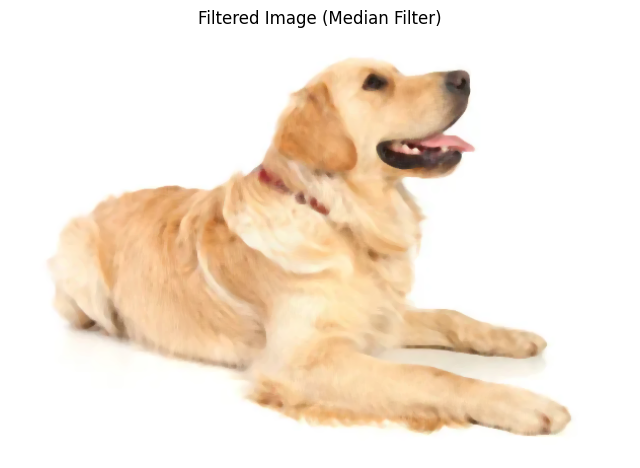

In [8]:
# Apply a median filter to remove noise
median_filtered_image = cv2.medianBlur(img, 5)

# Display the median filtered image
plt.figure(figsize=(8, 6))
plt.title("Filtered Image (Median Filter)")
plt.imshow(cv2.cvtColor(median_filtered_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
plt.axis('off')
plt.show()

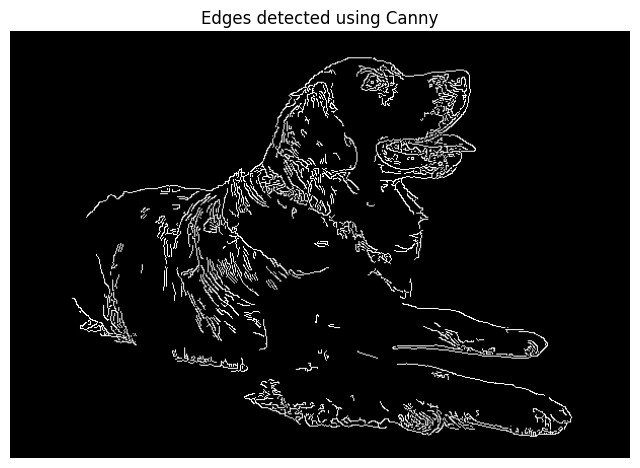

In [9]:
# Apply Canny edge detection
edges = cv2.Canny(img, 100, 200)

# Display the edges
plt.figure(figsize=(8, 6))
plt.title("Edges detected using Canny")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

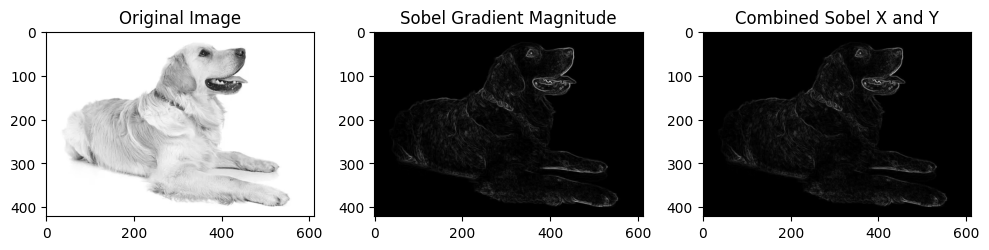

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = 'doggy.jpg' 
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded
if img is None:
    print("Error: Image not found. Please check the path.")
    exit()

# Compute gradients using Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradients
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the magnitude for better visualization
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = gradient_magnitude.astype(np.uint8)

plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Combined Sobel X and Y')
plt.imshow(cv2.addWeighted(np.abs(sobel_x), 0.5, np.abs(sobel_y), 0.5, 0), cmap='gray')

plt.tight_layout()
plt.show()

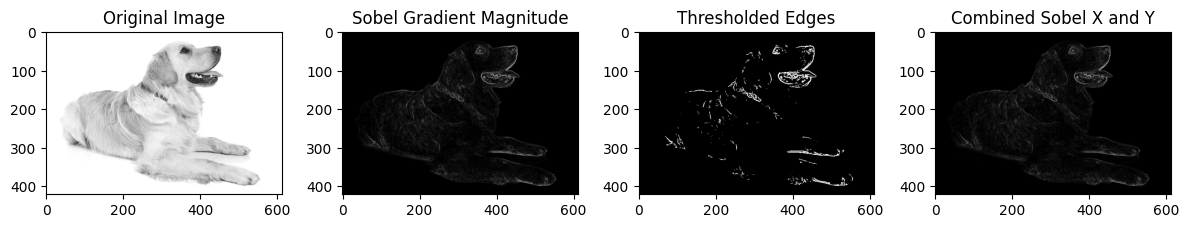

In [2]:
# Compute gradients using Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradients
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the magnitude for better visualization
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Apply thresholding to highlight stronger edges
threshold_value = 50  
_, thresholded_edges = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 4, 2)
plt.title('Sobel Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(1, 4, 3)
plt.title('Thresholded Edges')
plt.imshow(thresholded_edges, cmap='gray')

plt.subplot(1, 4, 4)
plt.title('Combined Sobel X and Y')
combined_gradients = cv2.addWeighted(np.abs(sobel_x), 0.5, np.abs(sobel_y), 0.5, 0)
plt.imshow(combined_gradients, cmap='gray')

plt.tight_layout()
plt.show()

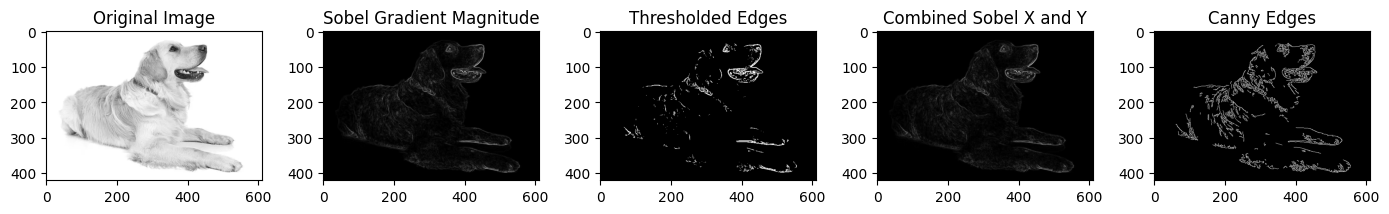

In [3]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img, 100, 200)

# Compute gradients using Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of the gradients
gradient_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the magnitude for better visualization
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)
gradient_magnitude = gradient_magnitude.astype(np.uint8)

# Apply thresholding to highlight stronger edges
threshold_value = 50
_, thresholded_edges = cv2.threshold(gradient_magnitude, threshold_value, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(14, 8))

plt.subplot(1, 5, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 5, 2)
plt.title('Sobel Gradient Magnitude')
plt.imshow(gradient_magnitude, cmap='gray')

plt.subplot(1, 5, 3)
plt.title('Thresholded Edges')
plt.imshow(thresholded_edges, cmap='gray')

plt.subplot(1, 5, 4)
plt.title('Combined Sobel X and Y')
combined_gradients = cv2.addWeighted(np.abs(sobel_x), 0.5, np.abs(sobel_y), 0.5, 0)
plt.imshow(combined_gradients, cmap='gray')

plt.subplot(1, 5, 5)
plt.title('Canny Edges')
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()


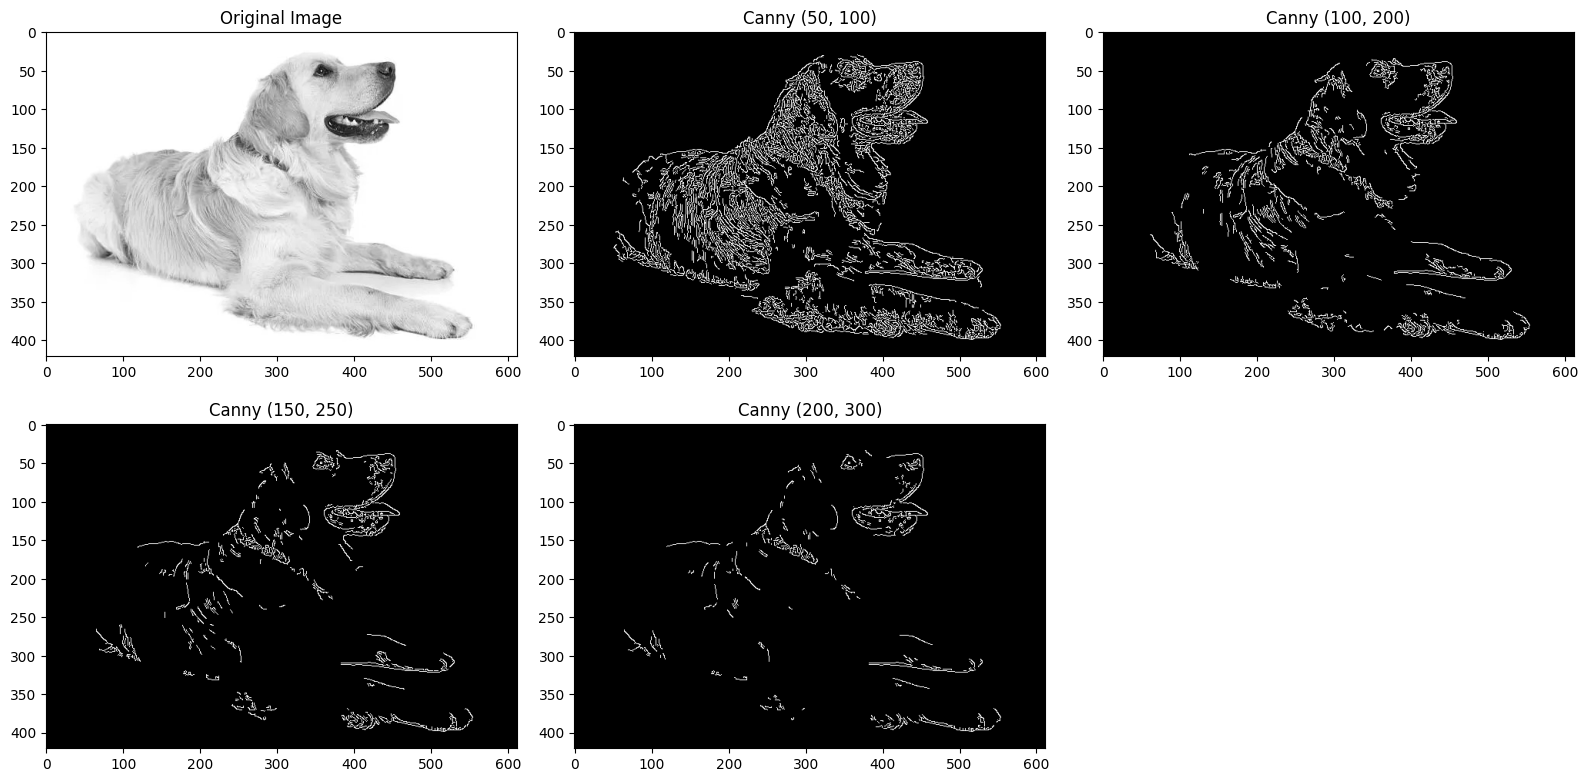

In [4]:
# Define different threshold pairs for experimentation
threshold_values = [
    (50, 100),
    (100, 200),
    (150, 250),
    (200, 300)
]

# Apply Canny edge detection for each threshold pair and store results
canny_results = []
for low_thresh, high_thresh in threshold_values:
    edges = cv2.Canny(img, low_thresh, high_thresh)
    canny_results.append((low_thresh, high_thresh, edges))

plt.figure(figsize=(16, 8))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

for i, (low_thresh, high_thresh, edges) in enumerate(canny_results):
    plt.subplot(2, 3, i + 2)
    plt.title(f'Canny ({low_thresh}, {high_thresh})')
    plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

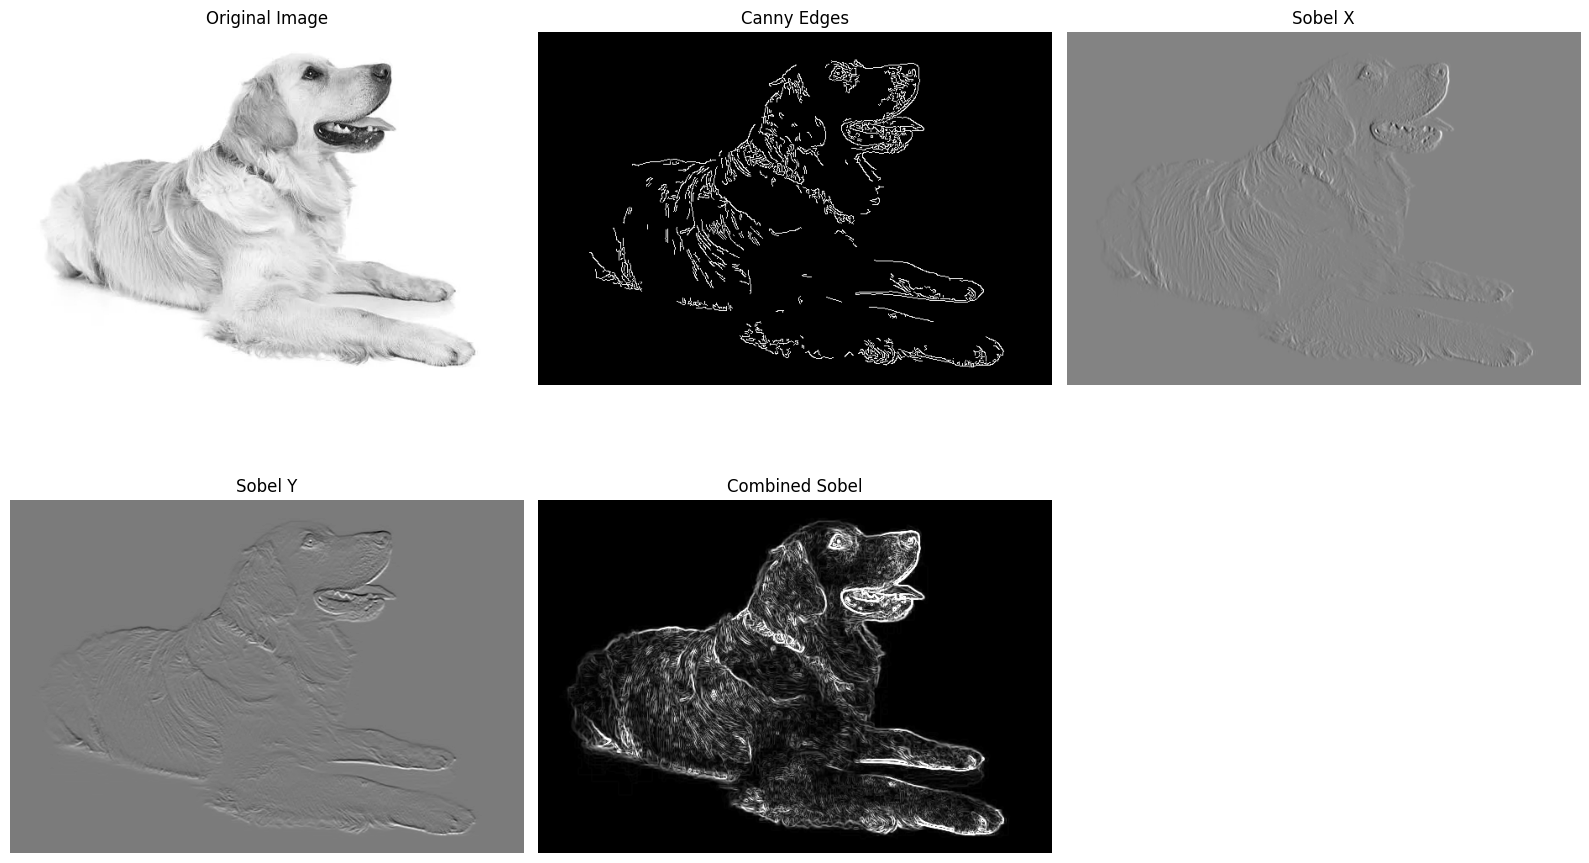

In [5]:
# Apply Canny edge detection
canny_edges = cv2.Canny(img, 100, 200)

# Apply Sobel filters
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Normalize the Sobel result
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Display results
titles = ['Original Image', 'Canny Edges', 'Sobel X', 'Sobel Y', 'Combined Sobel']
images = [img, canny_edges, sobel_x, sobel_y, sobel_combined]

plt.figure(figsize=(16, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.title(title)
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')

plt.tight_layout()
plt.show()

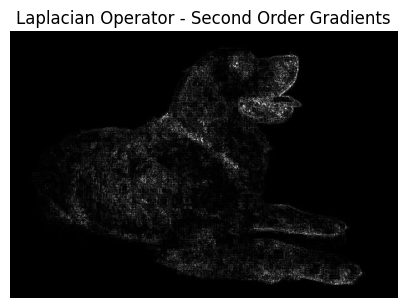

In [6]:
# Apply Laplacian operator to compute second-order gradients
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Normalize the Laplacian result
laplacian = cv2.convertScaleAbs(laplacian)

# Display the result
plt.figure(figsize=(5, 5))
plt.title('Laplacian Operator - Second Order Gradients')
plt.imshow(laplacian, cmap='gray')  # Display in grayscale
plt.axis('off')
plt.show()

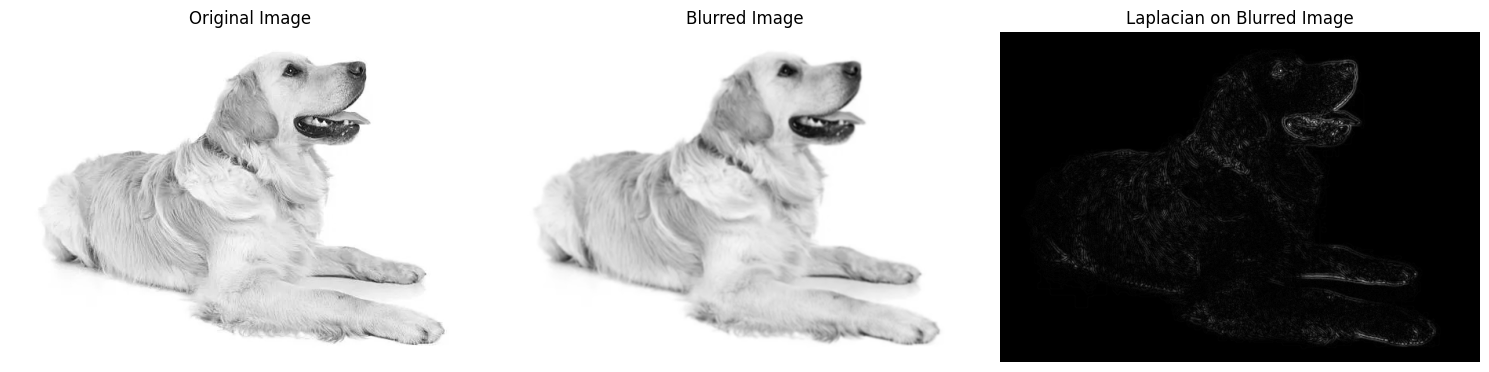

In [7]:
# Apply Gaussian Blurring
blurred_img = cv2.GaussianBlur(img, (5, 5), 1)  # Kernel size (5x5), sigma=1

# Apply Laplacian operator on blurred image
laplacian = cv2.Laplacian(blurred_img, cv2.CV_64F)

# Normalize the Laplacian result
laplacian = cv2.convertScaleAbs(laplacian)

# Display the results
titles = ['Original Image', 'Blurred Image', 'Laplacian on Blurred Image']
images = [img, blurred_img, laplacian]

plt.figure(figsize=(15, 5))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(1, 3, i + 1)
    plt.title(title)
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')

plt.tight_layout()
plt.show()

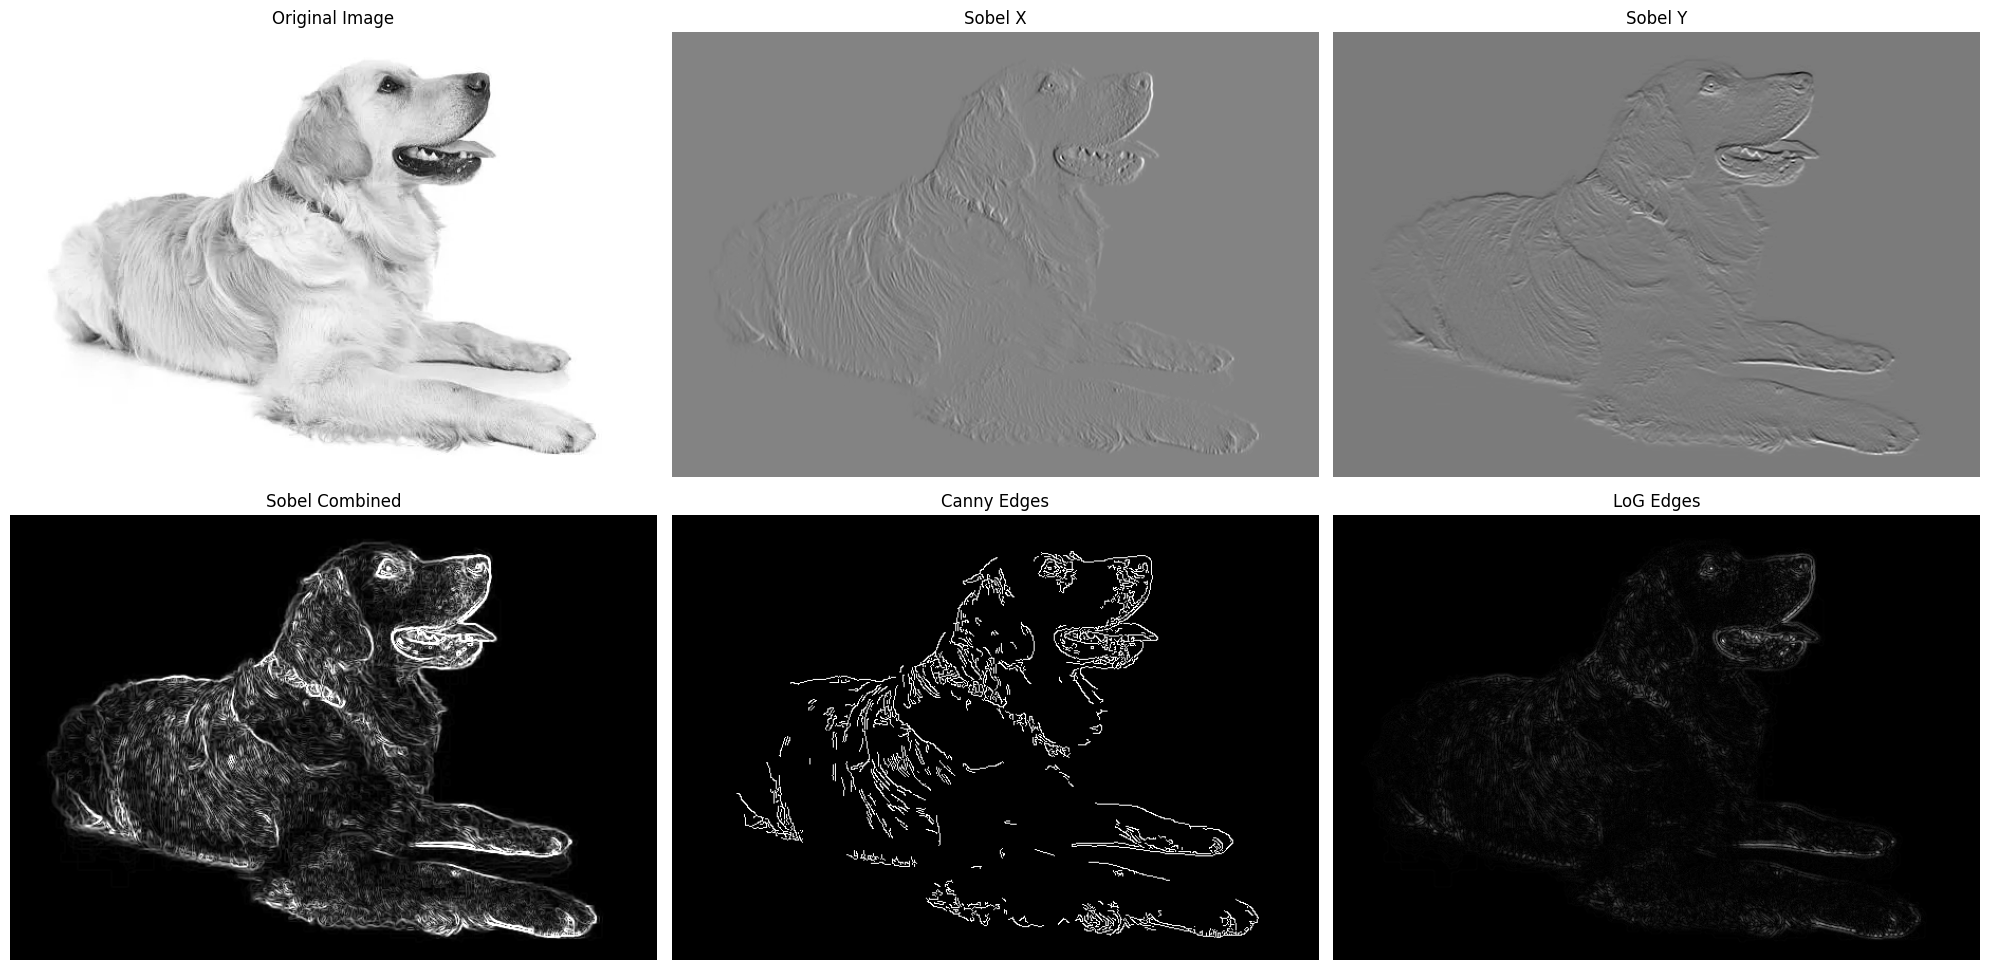

In [8]:
# Apply Sobel edge detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Apply Canny edge detection
canny_edges = cv2.Canny(img, 100, 200)

# Apply Laplacian of Gaussian (LoG) edge detection
blurred_img = cv2.GaussianBlur(img, (5, 5), 1)  # Apply Gaussian blur first
log_edges = cv2.Laplacian(blurred_img, cv2.CV_64F)
log_edges = cv2.convertScaleAbs(log_edges)

# Display results
titles = ['Original Image', 'Sobel X', 'Sobel Y', 'Sobel Combined', 'Canny Edges', 'LoG Edges']
images = [img, sobel_x, sobel_y, sobel_combined, canny_edges, log_edges]

plt.figure(figsize=(20, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.title(title)
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')

plt.tight_layout()
plt.show()


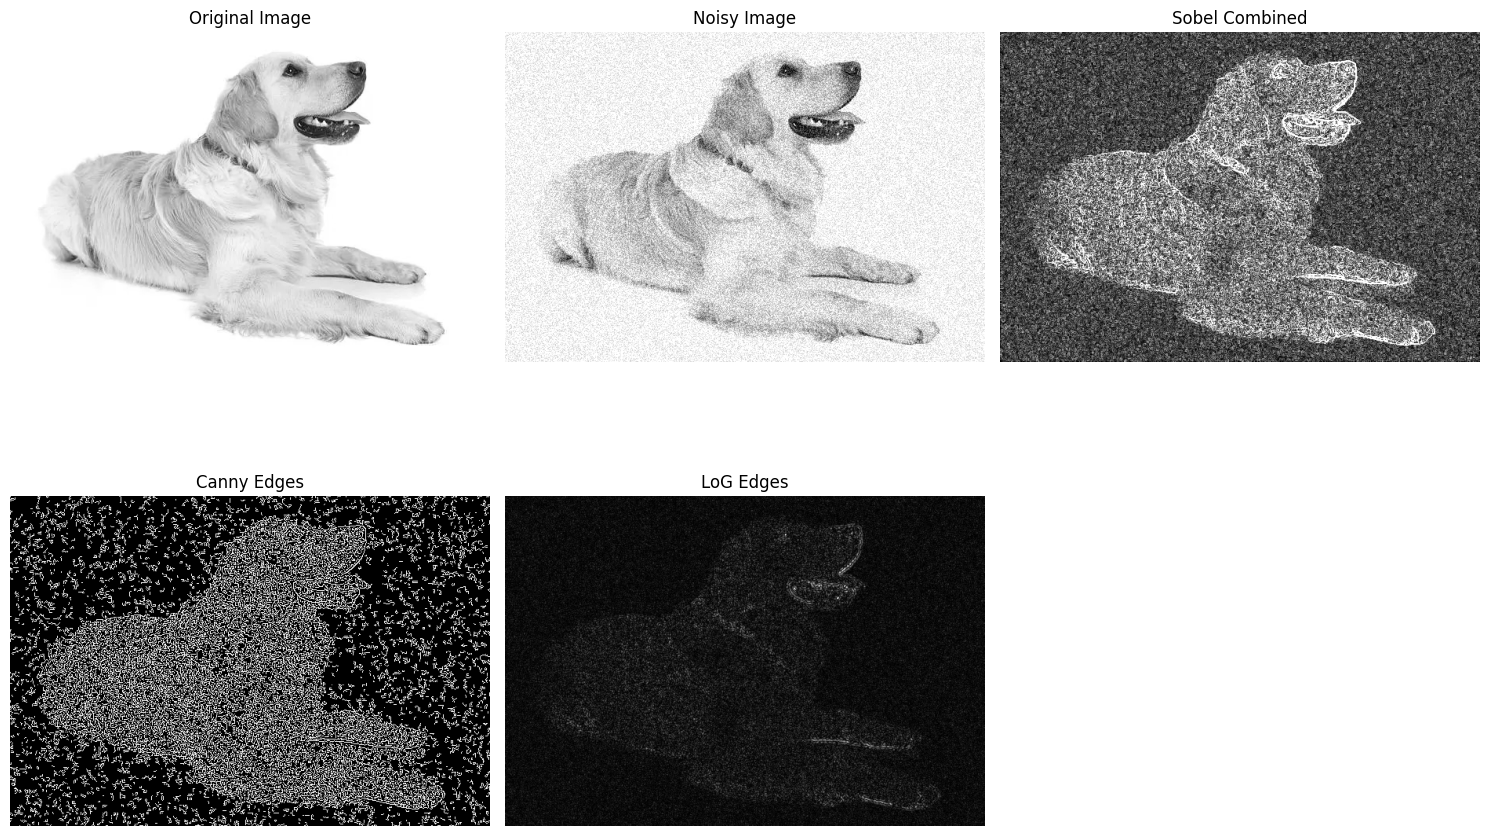

In [9]:
# Add random noise to the image
def add_random_noise(image, noise_level=20):
    noise = np.random.randint(-noise_level, noise_level, image.shape, dtype=np.int16)
    noisy_image = image.astype(np.int16) + noise
    noisy_image = np.clip(noisy_image, 0, 255) 
    return noisy_image.astype(np.uint8)

noisy_img = add_random_noise(img, noise_level=50)

# Apply Sobel edge detection
sobel_x = cv2.Sobel(noisy_img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(noisy_img, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)
sobel_combined = cv2.convertScaleAbs(sobel_combined)

# Apply Canny edge detection
canny_edges = cv2.Canny(noisy_img, 100, 200)

# Apply Laplacian of Gaussian (LoG)
blurred_img = cv2.GaussianBlur(noisy_img, (5, 5), 1)  # Apply Gaussian blur first
log_edges = cv2.Laplacian(blurred_img, cv2.CV_64F)
log_edges = cv2.convertScaleAbs(log_edges)

# Display results
titles = [
    'Original Image',
    'Noisy Image',
    'Sobel Combined',
    'Canny Edges',
    'LoG Edges'
]
images = [img, noisy_img, sobel_combined, canny_edges, log_edges]

plt.figure(figsize=(15, 10))
for i, (title, image) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.title(title)
    plt.imshow(image, cmap='gray')  # Display in grayscale
    plt.axis('off')

plt.tight_layout()
plt.show()